In [1]:
import pickle as pickle
import numpy as np
import matplotlib.pyplot as plt
import os
def load_CIFAR_batch(filename):
	""" load single batch of cifar """
	with open(filename, 'rb') as f:
		datadict = pickle.load(f,encoding='latin1')
		X = datadict['data']
		Y = datadict['labels']
		X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
		Y = np.array(Y)
		return X, Y
    
def load_CIFAR10(ROOT):
	""" load all of cifar """
	xs = []
	ys = []
	for b in range(1,6):
		f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
		X, Y = load_CIFAR_batch(f)
		xs.append(X)
		ys.append(Y)    
	Xtr = np.concatenate(xs)
	Ytr = np.concatenate(ys)
	del X, Y
	Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
	return Xtr, Ytr, Xte, Yte

In [2]:
Xtr, Ytr,Xte, Yte = load_CIFAR10('../input/')
Xte = Xtr[:1000, :] # take first 1000 for validation
Yte = Ytr[:1000]
Xtr = Xtr[1000:, :] # keep last 49,000 for train
Ytr = Ytr[1000:]

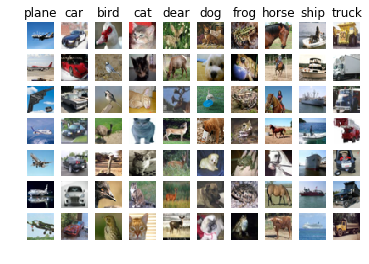

In [3]:
classes = ['plane', 'car', 'bird', 'cat', 'dear', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
num_each_class = 7

for y, cls in enumerate(classes):
    idxs = np.flatnonzero(Ytr == y)
    idxs = np.random.choice(idxs, num_each_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + (y + 1)
        plt.subplot(num_each_class, num_classes, plt_idx)
        plt.imshow(Xtr[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()


In [4]:
class Softmax(object):
	def __init__(self):
		pass    
	def train(self,W, X, y, reg):
		loss = 0.0
		dW = np.zeros_like(W)
		num_train = X.shape[0]
		num_classes = W.shape[1]
		scores = X.dot(W)
		scores = scores - np.max(scores, axis = 1).reshape(-1,1)
		softmax = np.exp(scores) / np.sum(np.exp(scores), axis=1).reshape(-1,1)
		loss = -np.sum(np.log(softmax[range(num_train), list(y)]))
		loss /= num_train
		loss += 0.5 * reg * np.sum(W * W)
		dS = softmax.copy()
		dS[range(num_train), list(y)] += -1
		dW = (X.T).dot(dS)
		dW = dW / num_train + reg * W  
		return loss, dW
    
	def predict(self,X,Y,W):
		scores=X.dot(W)
		Yte_predict = np.argmax(scores, axis=1)
		acc = np.mean(Yte_predict == Y)
		return acc

In [5]:
#处理训练数据
num_sample=Xtr.shape[0]
Xtr=Xtr.reshape(num_sample,-1)
Xtravg=np.mean(Xtr)#, axis=1)
Xtr-=Xtravg
b=np.ones((num_sample,1))
X_train=np.c_[Xtr,b]
print(X_train.shape)
#处理测试数据
num_test=Xte.shape[0]
Yte_predict=np.zeros(num_test)
Xte=Xte.reshape(num_test,-1)
b=np.ones((num_test,1))
X_test=np.c_[Xte,b]
print(X_test.shape)
#定义权重 步长 正则化系数
W=np.random.randn(X_train.shape[1],10)*0.001
reg=0.0001
step=0.000001

(49000, 3073)
(1000, 3073)


In [6]:
softmax=Softmax()
#train
for i in range(1000):
    loss,dW=softmax.train(W,X_train,Ytr,reg)
    W-= dW*step
    print("round:%d  loss:%f" % (i,loss))
print("W has been coculated")

round:0  loss:6.325660
round:1  loss:5.962885
round:2  loss:5.640154
round:3  loss:5.355302
round:4  loss:5.107172
round:5  loss:4.894588
round:6  loss:4.715428
round:7  loss:4.566194
round:8  loss:4.442195
round:9  loss:4.338320
round:10  loss:4.249899
round:11  loss:4.173181
round:12  loss:4.105369
round:13  loss:4.044457
round:14  loss:3.989020
round:15  loss:3.938040
round:16  loss:3.890778
round:17  loss:3.846687
round:18  loss:3.805350
round:19  loss:3.766442
round:20  loss:3.729701
round:21  loss:3.694912
round:22  loss:3.661895
round:23  loss:3.630495
round:24  loss:3.600580
round:25  loss:3.572032
round:26  loss:3.544747
round:27  loss:3.518633
round:28  loss:3.493608
round:29  loss:3.469597
round:30  loss:3.446531
round:31  loss:3.424351
round:32  loss:3.402999
round:33  loss:3.382425
round:34  loss:3.362582
round:35  loss:3.343428
round:36  loss:3.324923
round:37  loss:3.307030
round:38  loss:3.289717
round:39  loss:3.272953
round:40  loss:3.256709
round:41  loss:3.240958
ro

KeyboardInterrupt: 

In [ ]:
#predict
acc=softmax.predict(X_test,Yte,W)
print("accuracy: %f" % (acc,))